# Lab 5

Group members:
* Alex Balazs
* Kate Bouis
* Susan Bataju

## Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import matplotlib
from sklearn.metrics import accuracy_score
%matplotlib inline

plt.style.use('ggplot')
# %matplotlib inline
pd.set_option('display.max_columns', 40)
df = pd.read_csv('BankChurners.csv')
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1) # let's drop id from the start
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data_des = pd.DataFrame()
data_des["Features"] = df.columns
data_des

,Features
0,Attrition_Flag
1,Customer_Age
2,Gender
3,Dependent_count
4,Education_Level
5,Marital_Status
6,Income_Category
7,Card_Category
8,Months_on_book
9,Total_Relationship_Count


In [5]:
# Checking for missing data 
df.isna().sum()
# No empty data fields

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
# Check for duplicated values

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

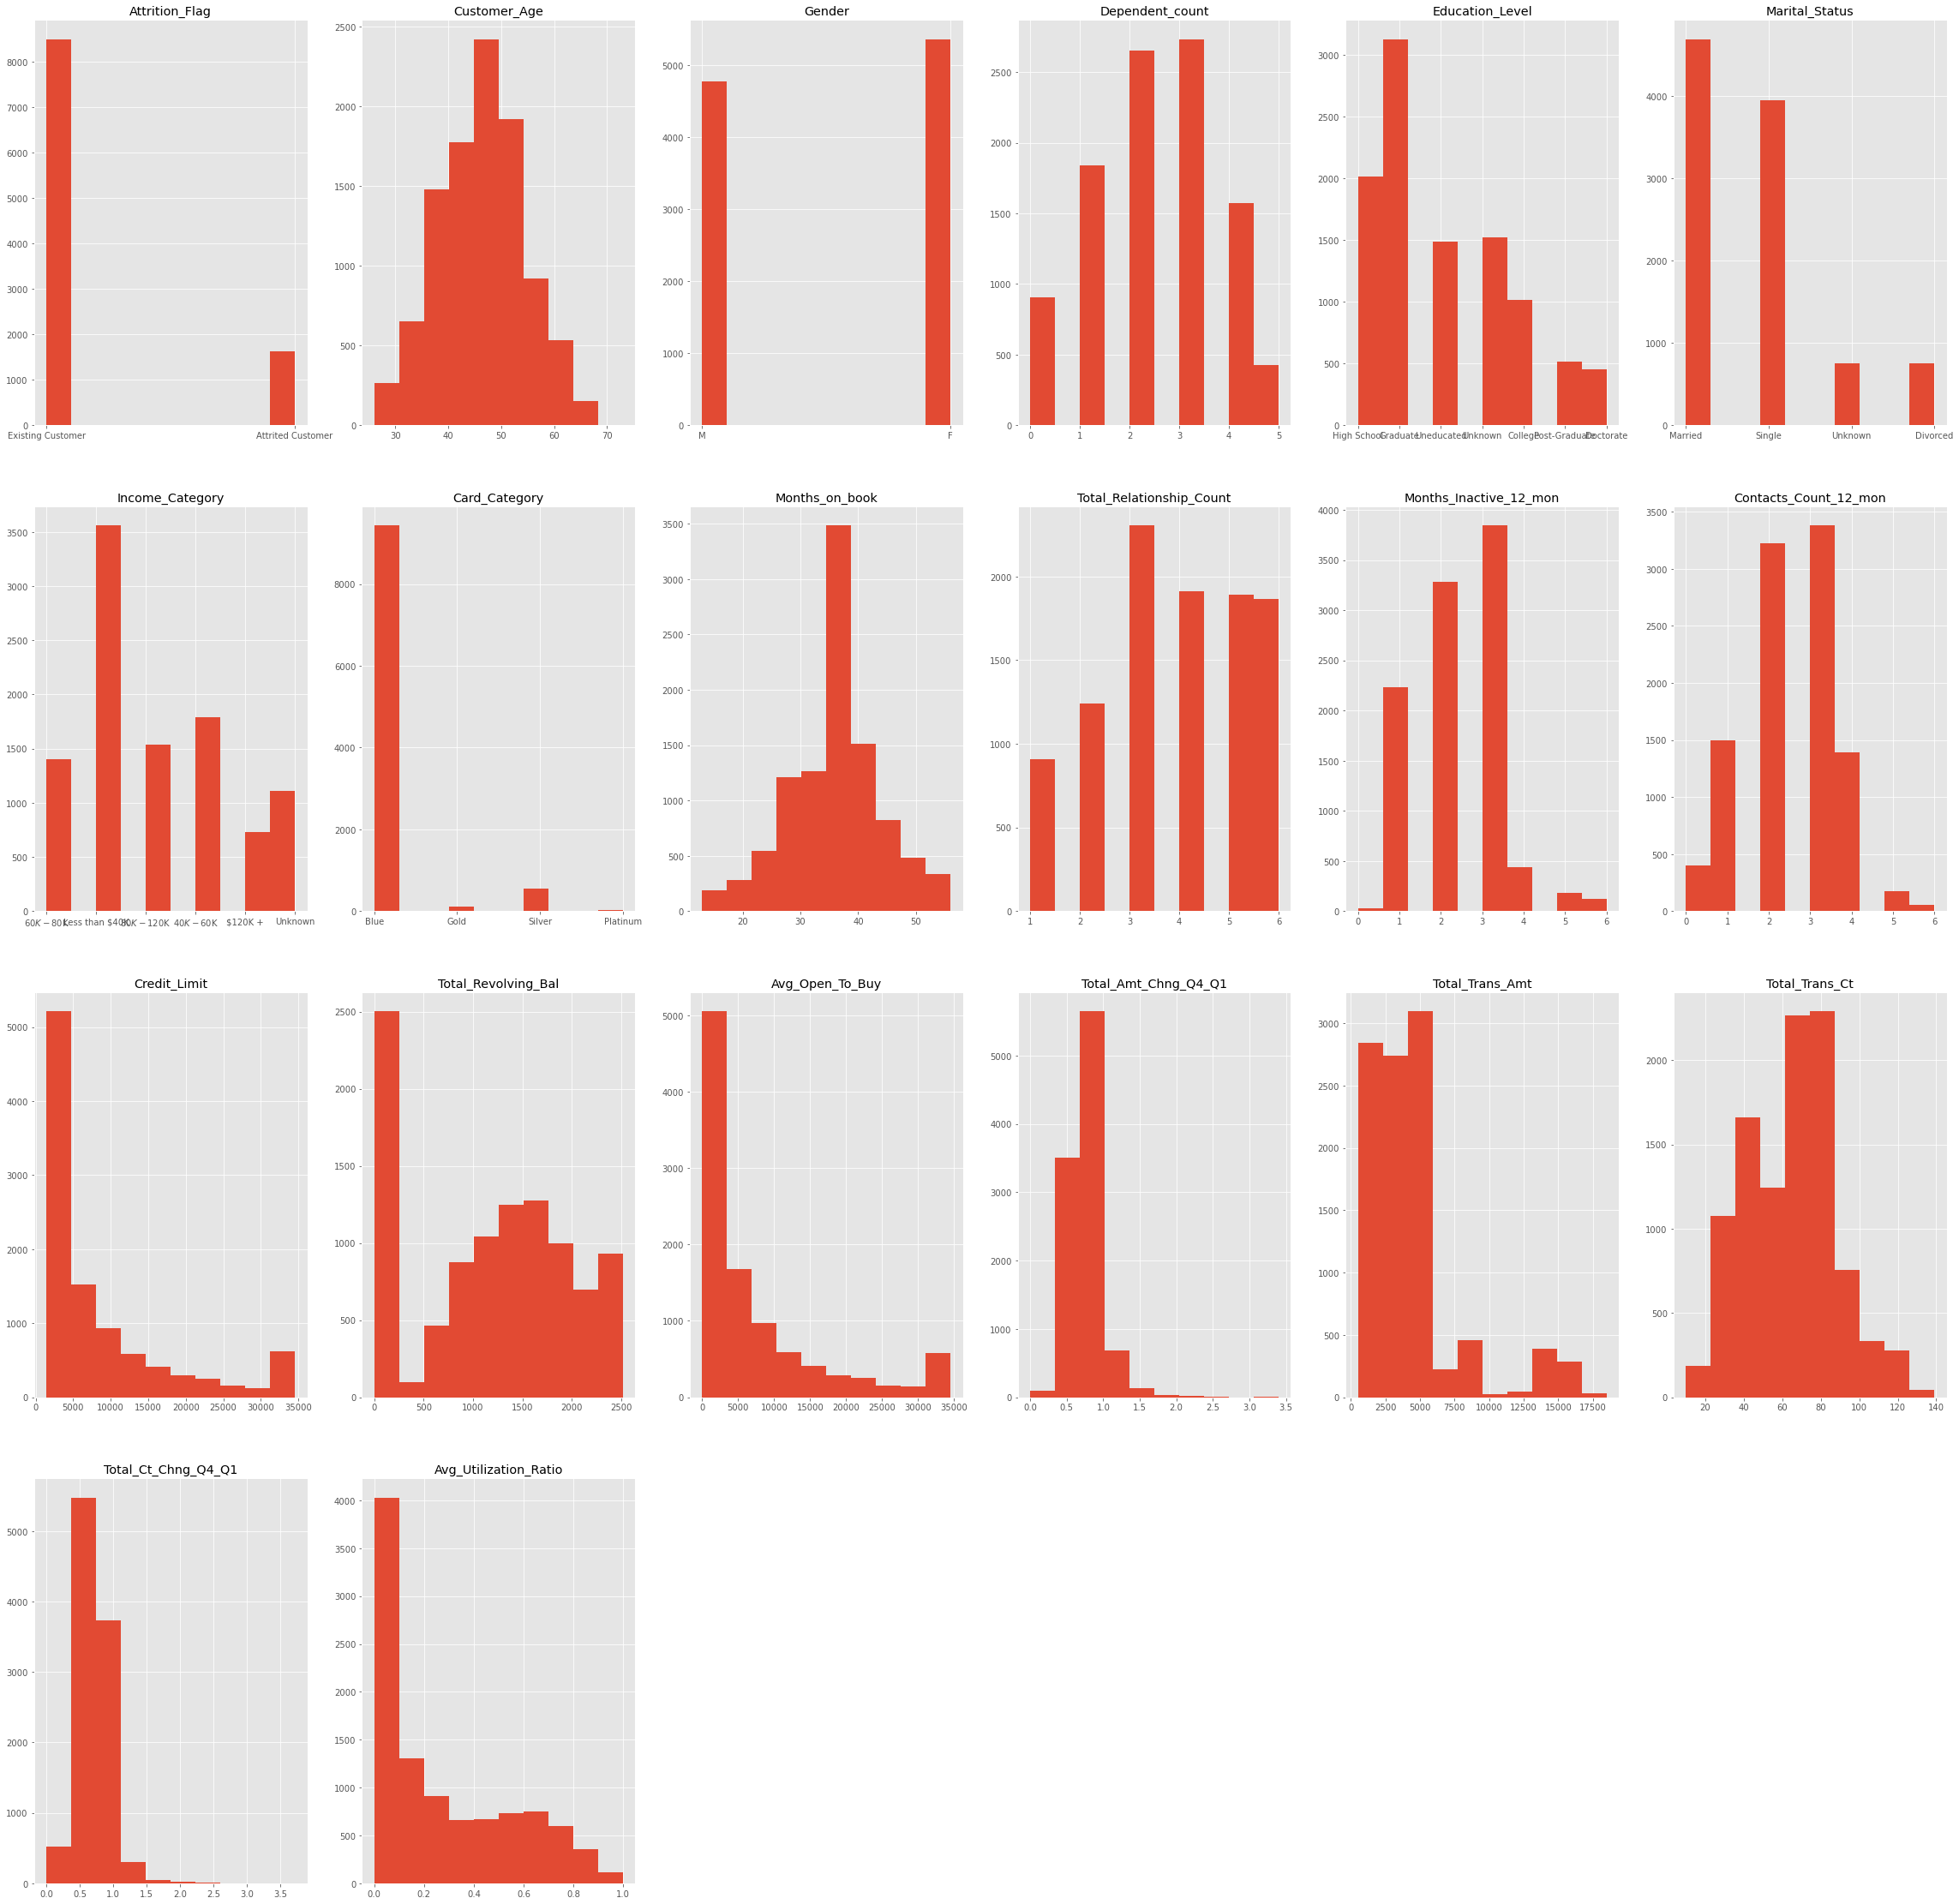

In [8]:

plt.figure(figsize=(40,40))
for i,c in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    df[c].hist()
    plt.title(c)
plt.show()

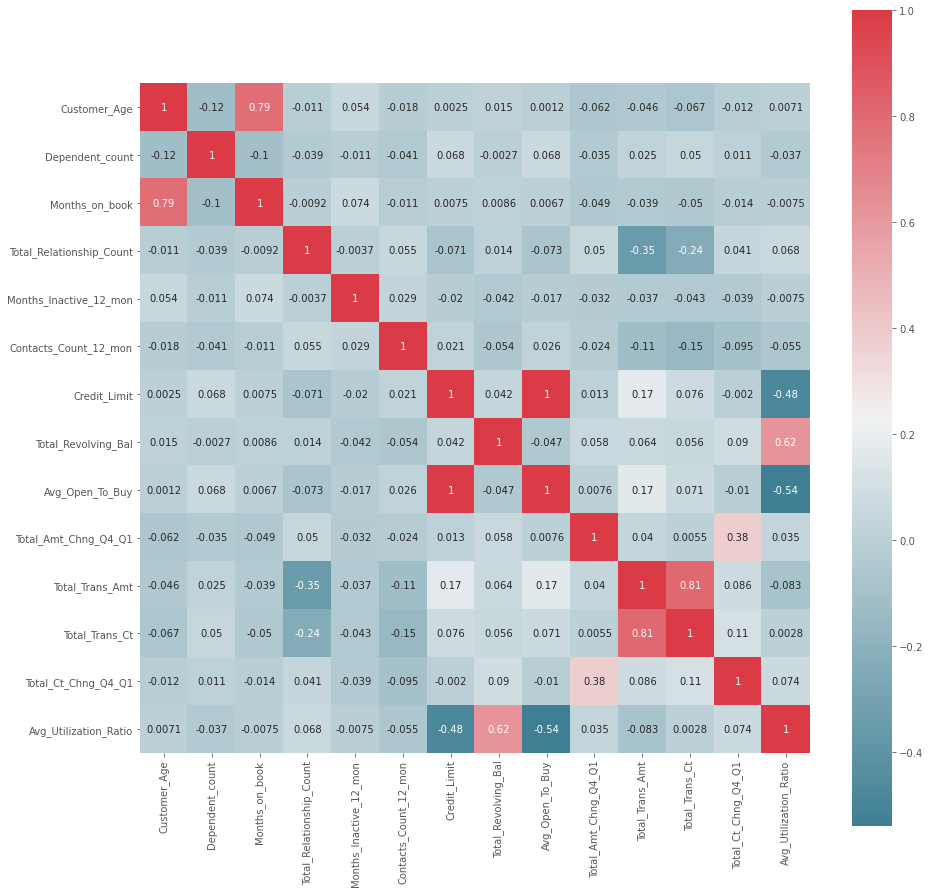

In [9]:
import seaborn as sns

categorical_headers = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numeric_headers = [i for i in df.columns if i not in categorical_headers]
plt.figure(figsize=(15, 15))
corr=df[numeric_headers].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

In [10]:
# drop Avg_Open_To_Buy column because it represents the same distributions as Credit_Limit 
df.drop('Avg_Open_To_Buy', axis=1, inplace=True)

In [11]:
encoded_df = df.copy()

In [12]:
# Labeling target variable (attrition)... 0 = not attrited, 1 = attrited
encoded_df["Attrition_Flag"] = encoded_df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

# Label encoding gender... Male = 0, Female = 1
encoded_df["Gender"] = encoded_df["Gender"].map({"M":0, "F":1})

# Cleaning and ordinalizing income category data
from sklearn.preprocessing import LabelEncoder

inc_labels = LabelEncoder()
df["Income_Labels"] = inc_labels.fit_transform(encoded_df["Income_Category"])
encoded_df.drop(["Income_Category"], inplace = True, axis = 1)

# Ordinalizing marital status
encoded_df["Marital_Status"] = encoded_df["Marital_Status"].map({"Unknown":0, "Single":1, "Married":2, "Divorced":3})

In [13]:
encoded_df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [14]:
encoded_df["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [15]:
onehot_df = encoded_df.copy()

# one hot encoding card category and education
one_hot = pd.get_dummies(onehot_df['Card_Category'])
onehot_df = onehot_df.drop('Card_Category',axis = 1)
# Join the encoded df
onehot_df = onehot_df.join(one_hot)


one_hot = pd.get_dummies(onehot_df['Education_Level'])
onehot_df = onehot_df.drop('Education_Level',axis = 1)
# Join the encoded df
onehot_df = onehot_df.join(one_hot)

In [16]:
onehot_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Blue,Gold,Platinum,Silver,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0,45,0,3,2,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1,0,0,0,0,0,0,1,0,0,0
1,0,49,1,5,1,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,1,0,0,0,0,0,1,0,0,0,0
2,0,51,0,3,2,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1,0,0,0,0,0,1,0,0,0,0
3,0,40,1,4,0,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,1,0,0,0,0,0,0,1,0,0,0
4,0,40,0,3,2,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,1,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462,1,0,0,0,0,0,1,0,0,0,0
10123,1,41,0,2,3,25,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511,1,0,0,0,0,0,0,0,0,0,1
10124,1,44,1,1,2,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000,1,0,0,0,0,0,0,1,0,0,0
10125,1,30,0,2,0,36,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000,1,0,0,0,0,0,1,0,0,0,0


In [17]:
# normalize data using mean normalization 
normalized_df=(onehot_df-onehot_df.min())/(onehot_df.max()-onehot_df.min())

normalized_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Blue,Gold,Platinum,Silver,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0.0,0.404255,0.0,0.6,0.666667,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.392994,0.035273,0.248062,0.437534,0.061061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.489362,1.0,1.0,0.333333,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.453636,0.043452,0.178295,1.000000,0.105105,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.531915,0.0,0.6,0.666667,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.763615,0.076611,0.077519,0.628164,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.297872,1.0,0.8,0.000000,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.413600,0.036775,0.077519,0.628164,0.760761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.297872,0.0,0.6,0.666667,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.640271,0.017025,0.139535,0.673129,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.510638,0.0,0.4,0.333333,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.206947,0.832647,0.829457,0.230749,0.462462,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10123,1.0,0.319149,0.0,0.4,1.000000,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.236679,0.459219,0.457364,0.183899,0.511512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10124,1.0,0.382979,1.0,0.2,0.666667,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.241095,0.544175,0.387597,0.220248,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10125,1.0,0.085106,0.0,0.4,0.000000,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.157492,0.438689,0.403101,0.194400,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


To give a little background, the goal of our dataset is to predict which customers are close to leaving their credit card services. The purpose of our prediction task is to reach out to those identified customers to prevent them from cancelling their credit card. The dataset has 10.1k unique data samples, and the column 'Attrition_Flag' serves as our target. 'Attrition_Flag' is classified binarily with the values 'Existing Customer' and 'Attrited Customer'. Our goal is to see what factors all of the attrited customers have in common and then to see which existing customers are close to reaching those levels so that we can identify which customers are close to becoming attrited.

In this first preparation section, we first checked for empty values and duplicates. Both of these searches came up empty, so we did not have to get rid of any of the data samples. Then, we removed the last two columns, which were  NaiveBayes classifiers used by the creators of this dataset. These classifiers did not provide us relevant data on the customers but rather a sort of metric for how well the creators' algorithm performed on the dataset, so we did not want it for our purposes, as it would potentially skew our predictions. We also dropped the column labelled 'CLIENTNUM' because these numbers were 9 digit unique identifiers, and as a customer's random ID does not have any sort of pattern to it, this column would skew our results by introducing noise. Finally, we dropped the 'Avg Open To Buy' variable because it had almost the exact same associations as 'Credit Limit', so one of them had to go.

These were the only four columns we removed. Then, we worked on changing the classification data to have either integer representation or one hot encodings, depending on the context surrounding the data. We label encoded attrition, gender, and marital status, mainly because these variables did not have as many unique values. For example, attrition and gender are both binary classifications, so we only needed the values of '0' and '1', and one hot encoding was therefore not necessary. Also, while we could have potentially one hot encoded marital status, it only had 4 unique values (1 of which was 'unknown') so we decided to integer encode it instead with integers from 0-3. We also used a fit-transorm for income, and the reason that we did not one hot encode 'Income_Category' was because the distance in between different income values is actually significant. The income variable is separated into different categories in ascending order, so we wanted to maintain the fact that a 120k income is, for example, closer to an 80k income than it is to a $40k income.

Then we one hot encoded education and card level. The reason for this is because these variables had multiple values within them without any distinct way to quanitfy the difference between different values. For example, the difference between a blue and a silver card may be difference than a blue and a gold card, but the differences are harder to measure than the differences in income are. Therefore, using label encoding would be imperfect and it is safer to go with one-hot in this scenario. Finally, we did one-hot encoding with education for the same reason, especially because there are 7 different education levels. While there is some clear increase in education with these variables - they do have a distinct relationship with one another - the 'unknown' could throw these values off, and there are so many unique values that it is safer to one hot encode.

We ended by normalizing our dataframe and placing this into a variable called 'normalized_df' so that we could maintain our original dataframe just in case. We normalized so that the variables with larger average values, such as 'Credit_Limit', would not be weighed far more heavily than the variables with much smaller average values, such as 'Total_Amount_Chng_Q4_Q1'. We used min/max normalization so that every single value in the dataframe is now between 0 and 1. 

In conclusion, our final dataset is normalized, three columns were dropped, and all classification variables were either label encoded or one hot encoded, depending on the context of that specific variable. All of these decisions have been justified above.

Next, we look to identify the groups to be combined into cross-product features as well as our justifications for these decisions.

We crossed our data twice, with the first instance containing 4 crosses and the second instance containing 3 crosses.

Our first batch of crosses mainly focused on demographic data that was categorical, and it contained many of the same variables in its crosses. We first crossed 'Gender', 'Education Level', 'Marital Status', and 'Income Category'. Then, we crossed 'Gender', 'Education Level', and 'Marital Status'. Next was 'Gender', 'Education Level', and 'Income Category'. Finally, we just crossed 'Gender' and 'Education Level'. As you can see, we used different combinations of the same four different variables for this first batch, mainly because we wanted to see which of these demographical data points made the greatest impact, if any.

For the second batch of crosses, we wanted to firstcross 'Credit Limit', 'Total Revolving Balance', 'Total Trans Amt', and 'Avg Utilization Ratio'. Now we want to dive much deeper, beyond basic demographics, and really analyze the financial implications of a consumer closing their credit card. Possibly the total revolving balance is too close to the credit limit, or they use their card often and for many transactions but don't have as high a credit limit as others. This could lead to consumer dissatisfaction, especially if they feel like they deserve a higher line of credit for being an active user, and they may want to switch banks so they can get a card with a higher limit without having too many accounts open. There are many possibilities that this crossing of features can create and we want to explore all of the  different options.

Second, it would be interesting to see the results of crossing 'Age', 'Dependent Count', 'Marital Status', 'Income Category', and 'Credit Limit' because these factors can correlate to one another and therefore we can see outliers that we may not have seen by looking at the features individually. For example, income category and credit limit are normally closely tied together, as banks feel more comfortable giving a higher line of credit to consumers who they know are good for it. However, maybe more people with a higher income and lower credit limit become attrited, due to the reasoning in the above paragraph. Finding combination outliers like this will improve our algorithm's chances.

Finally, we are going to create a third cross-product feature that consists of the 'Months on Book', 'Total Relationship', 'Total Revolving Balance', and 'Total Amt Change Q4Q1' columns. This is primarily a measure of consumer loyalty so that we can see how important loyalty is to a customer remaining with a bank or becoming attrited. 'Total Relationship' is how many products the consumer owns, while 'Months on Book' is a measure of how long the consumer has been with the product. For example, if we see consumers with a low 'Months on Book' value but a high 'Total Relationship' or 'Total Revolving Balance' flag, this may raise some red flags as to a disloyal customer who could be jumping around between banks to get as much credit as they're able to. On the other hand, if we compare 'Months on Book' to 'Total Amt Change' and see a customer who has been with the bank for a long time but whose spending has recently decreased drastically, that could raise red flags that the customer may leave soon as well.


These are the groups that we identified to be combined into cross-product features. Next, we are going to choose metrics for our algorithm performance. 

For our purposes, recall is the most important metric. We need to fully focus on getting recall as high as it can be, because the cost of false positives and false negatives are both rather high in our business use-case, false negatives understandably more so. Therefore, we can use both precision and recall, but since recall includes false negatives in its equation and precision only deals with positives, recall is the better choice for us. We also want to calculate the F1 score just to see the harmonic mean between precision and recall, but in the end, false negatives are more significant than false positives, so recall is our best option.

False negatives are clearly very costly, for if we identify a customer as not being at risk for attrition but then they leave anyway, we have lost a customer, and every customer is important to our business. The entire point of this classification set is to minimize the loss of customers, so we absolutely cannot tolerate any sort of false negative. At the very least, we need to minimize the false negatives to our fullest extent so that we can work for the best customer retention. False positives are also problematic, but less so. They are an issue because if we identify a customer as at risk for attrition, we will present them with all sorts of incentives to stay. However, if that customer was loyal and not planning on leaving at all, then we lost some money by providing incentives and rewards to a customer who would have been perfectly fine without them. Regardless, these rewards may still incentivize the loyal customer to spend more and it would still boost morale, so in the end, this loss is not nearly as great as that of the false negative.

Accuracy, on that same note, is less important, especially because only 16% of the entire dataset is an Attrited Customer, and therefore our accuracy could get as high as 84% while still getting everything wrong. There is a lower possibility of a random customer being on their way to attrition versus just having a low spending month, for example, so we need to strive for recall and precision over accuracy in these particular circumstances. Therefore, we also plan on creating a confusion matrix to map our numbers of false negatives and false positives as a way to better visualize these results.

Finally, to divide our data into training and testing, we plan to use a train_test_split with a random state, which functions similarly to ShuffleSplit. After creating the training and testing sets, we will put them into their own dataframes so we can alter the information more easily. Additionally, as we progress through training our model, our training set will be divided into 'train' and 'validation' so that our model can be trained without ever having to worry about data snooping.

Our rationale for doing this is that we don't want our algorithm to ever see the data values it is going to be tested on so that we can accurately assess the effectiveness of our model. Therefore, to prevent data snooping, we use a validation set to trian our model. Then, once our algorithm is trained, we will test it on the untouched test set. This is a realistic mirroring of how our algorithm would be used in practice, because once our algorithm is iteratively trained over the full validation set, it will be ready to classify data that it has never seen before. This is best for our business case because we want to ensure that our algorithm stands alone and that it works on new data, because realistically, new data will be continually introduced every quarter as the bank tries to predict what other customers may be planning on leaving.

## Modeling

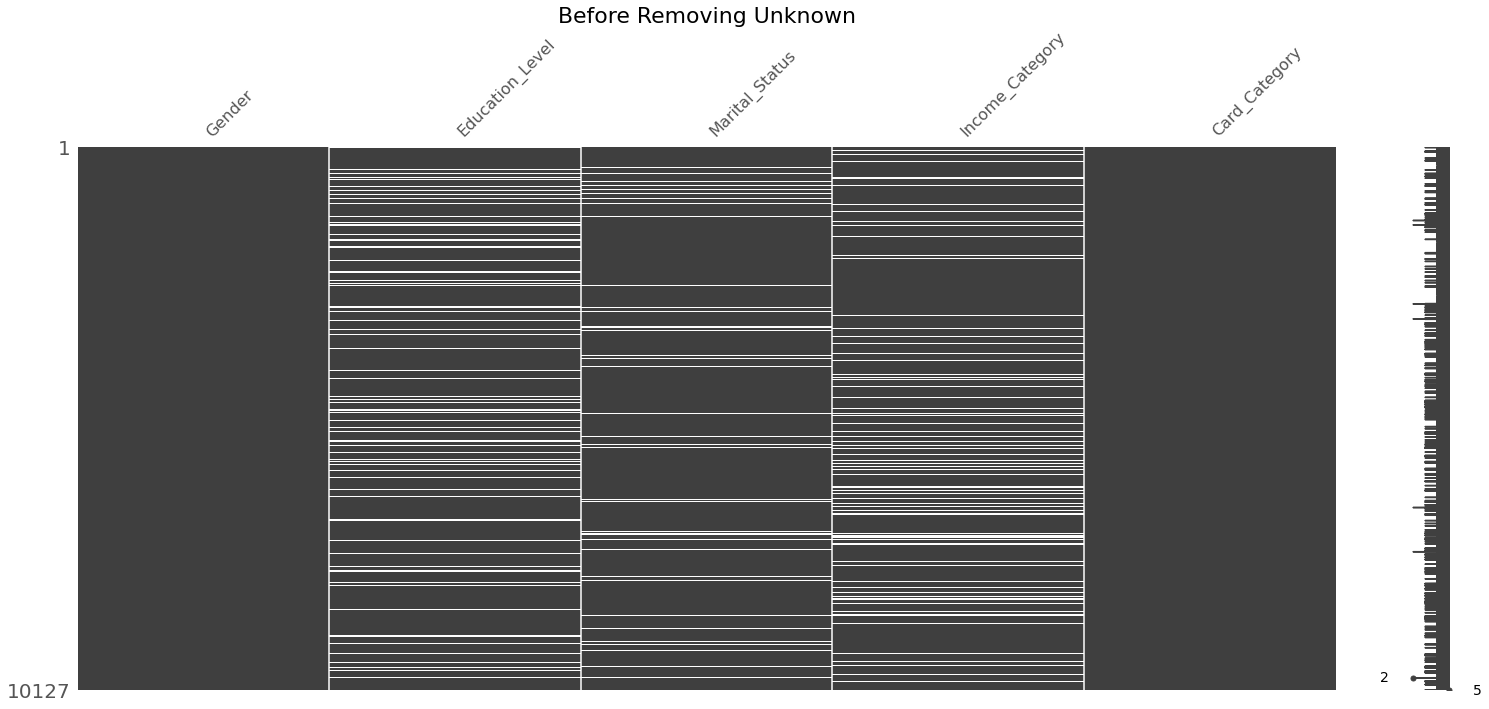

<Figure size 432x288 with 0 Axes>

In [18]:
from sklearn.preprocessing import StandardScaler
import missingno as mn

categorical_headers = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numeric_headers = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']


for col in categorical_headers:
    df[col].replace('Unknown',np.NaN,inplace=True)


mn.matrix(df[categorical_headers])
plt.title("Before Removing Unknown",fontsize=22)
plt.figure()

df.dropna(inplace=True)

encoders = dict()
tmp = LabelEncoder()
df['Attrition_Flag'+'_int'] = tmp.fit_transform(df['Attrition_Flag'])
for col in categorical_headers:
    encoders[col] = LabelEncoder() 
    df[col+'_int'] = encoders[col].fit_transform(df[col])

categorical_headers_ints = [x+'_int' for x in categorical_headers]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   object 
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   object 
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   object 
 5   Marital_Status            7081 non-null   object 
 6   Income_Category           7081 non-null   object 
 7   Card_Category             7081 non-null   object 
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Total_A

<Figure size 432x288 with 0 Axes>

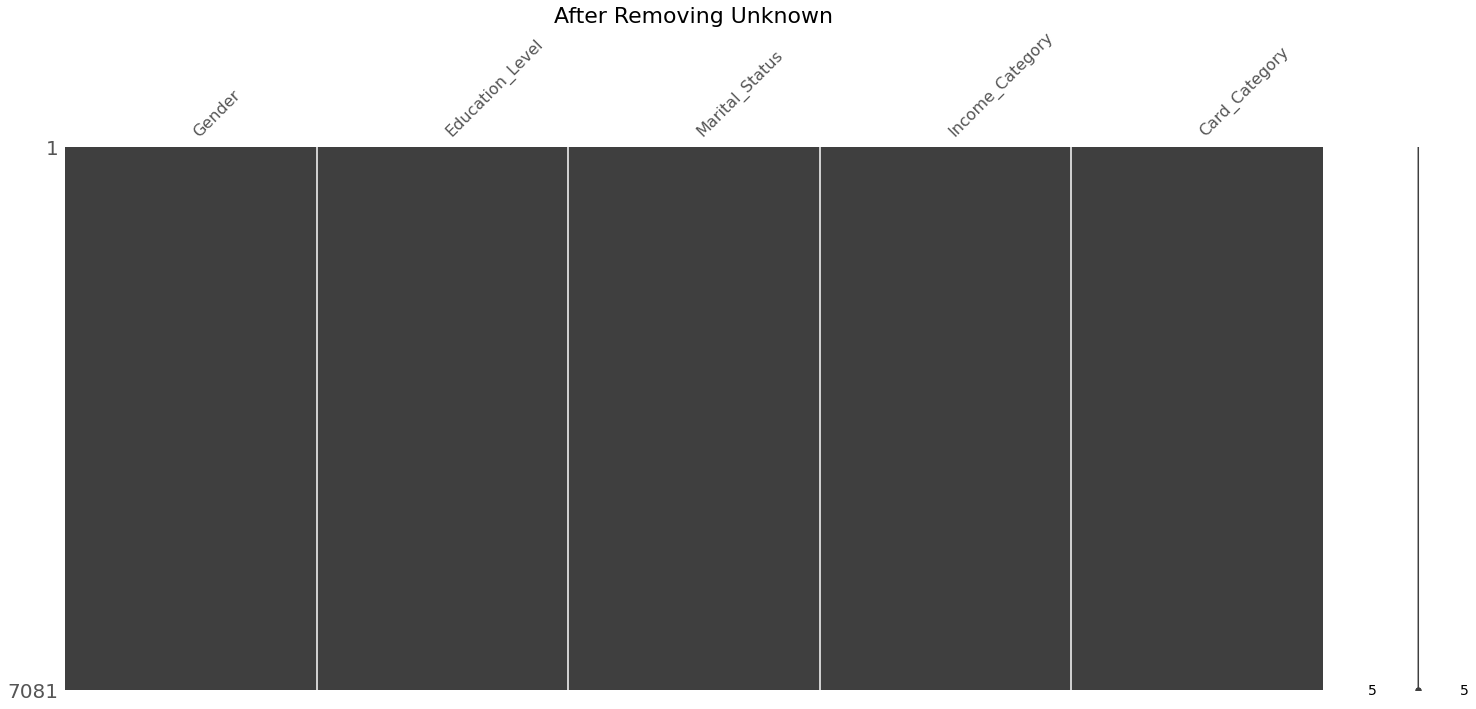

<Figure size 432x288 with 0 Axes>

In [20]:

import missingno as mn

mn.matrix(df[categorical_headers])
plt.title("After Removing Unknown",fontsize=22)
plt.figure()




In [21]:
from sklearn import metrics as mt
import matplotlib.patches as patches
#https://matplotlib.org/stable/tutorials/text/text_props.html#sphx-glr-tutorials-text-text-props-py
def summarize_net(net, yhat, y_test, title_text=''):
    labels = ['Attrited','Existing']
    # build a rectangle in axes coords
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width 
    top = bottom + height
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])

    # axes coordinates: (0, 0) is bottom left and (1, 1) is upper right
    p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False)
    ax.add_patch(p)
    ax.text(right+0.75, bottom+0.5, f'accuracy : {acc:.3f} \n recall : {mt.recall_score(y_test,yhat):.3f} ',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)


    # cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels, square=True )

    plt.title(title_text+'{:.4f}'.format(acc))
    
def plot_roc(class_,name,y_train,ytrainhat):
#     plt.figure(figsize=(6,4))
    roc1 = mt.roc_curve(y_train,ytrainhat)
    fpr,tpr,_=roc1
    plt.plot(fpr, tpr, 'r',label=f'train (area = {mt.auc(fpr,tpr)*100:.1f})%')

    plt.legend()
    plt.title(name)

def plot_train_val(text,auc,val_auc,loss,val_loss):
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(auc,label='Training ')

    plt.ylabel(f'{text} %')
    # plt.title('Training')
    # plt.subplot(2,2,2)
    plt.plot(val_auc,label='Validation')
    # plt.title('Validation')
    plt.legend()

    plt.subplot(2,2,3)
    plt.plot(loss,label='Training Loss')
    # plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')

    # plt.subplot(2,2,4)
    plt.plot(val_loss,label='Val Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

In [46]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dense, Activation, Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras

embed_branches = []
all_branch_outputs = [] # this is where we will keep track of output of each branch

# feed in the entire matrix of categircal variables
input_branch = Input(shape=(len(categorical_headers_ints),), 
                     dtype='int64', 
                     name='categorical')
for idx,col in enumerate(categorical_headers_ints):
    # if 'Attrition_Flag_int' in col: continue #skip the target
    N = len(encoders[categorical_headers[idx]].classes_)
    print(col,N)

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_branch, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs in list to concatenate later
    all_branch_outputs.append(x)

# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=9,
                    activation='relu',
                    name='combined0' )(final_branch)
# final_branch = Dropout(0.5)(final_branch)
final_branch = Dense(units=9,
                    activation='relu',
                    name='combined1' )(final_branch)                 
final_branch = Dense(units=1,
                     activation='sigmoid', 
                     name='combined2')(final_branch)

model = Model(inputs=input_branch, outputs=final_branch)
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]
model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics)

model.summary()

Gender_int 2
Education_Level_int 6
Marital_Status_int 3
Income_Category_int 5
Card_Category_int 4
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 categorical (InputLayer)       [(None, 5)]          0           []                               
                                                                                                  
 tf.compat.v1.gather_10 (TFOpLa  (None,)             0           ['categorical[0][0]']            
 mbda)                                                                                            
                                                                                                  
 tf.compat.v1.gather_11 (TFOpLa  (None,)             0           ['categorical[0][0]']            
 mbda)                                                                                       

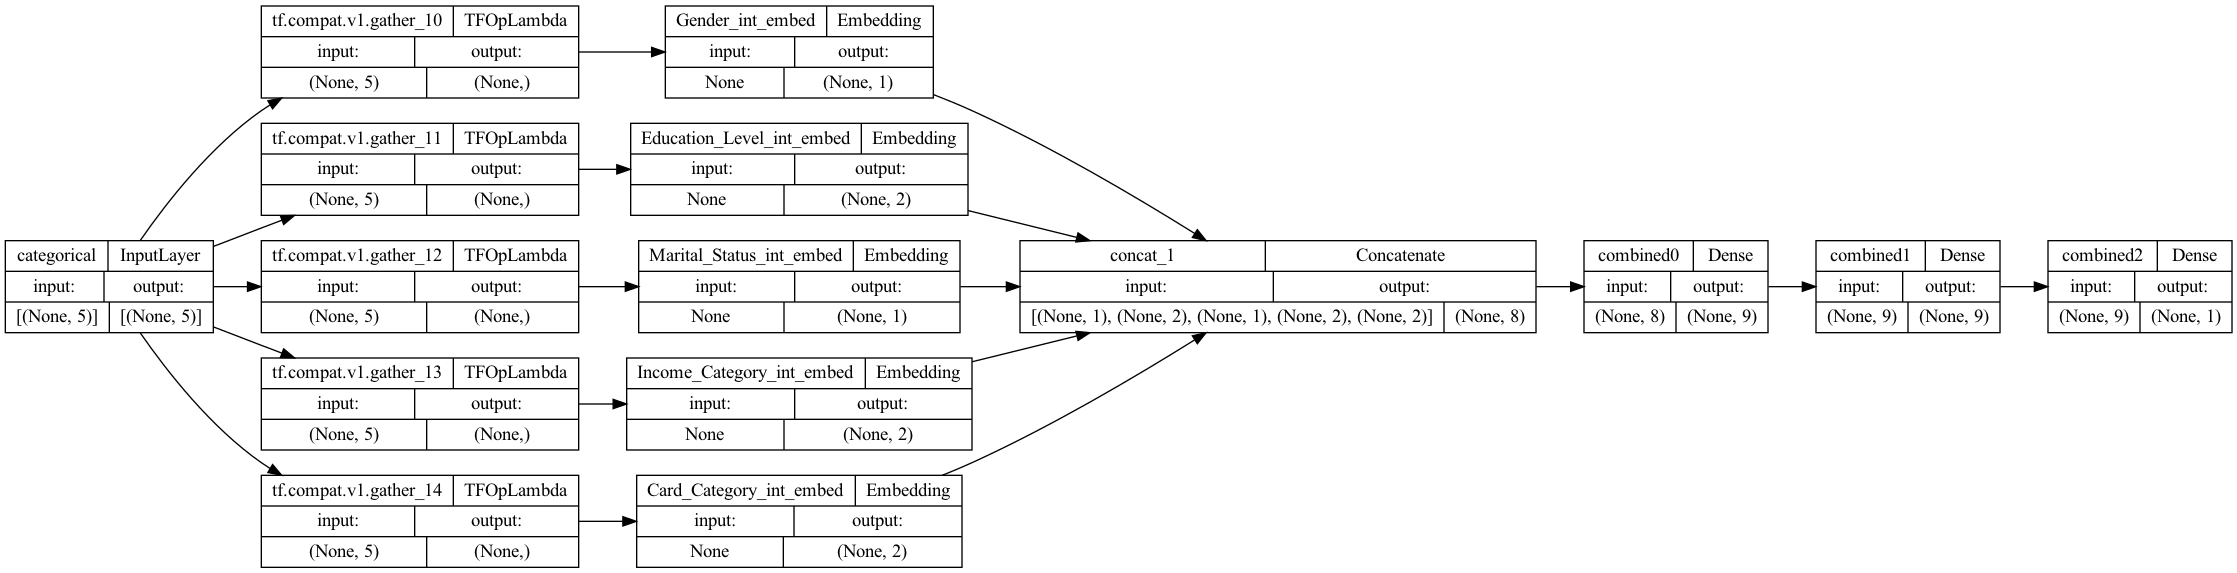

In [47]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [48]:
cat_df = df[categorical_headers_ints]
cat_y = df['Attrition_Flag_int']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cat_df , cat_y , test_size=0.20, random_state=42,stratify=cat_y.to_numpy())

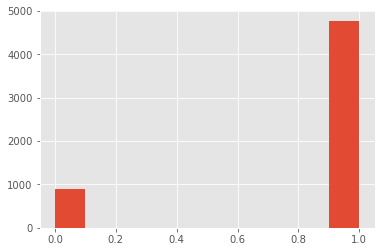

In [50]:
y_train.hist()
plt.show()

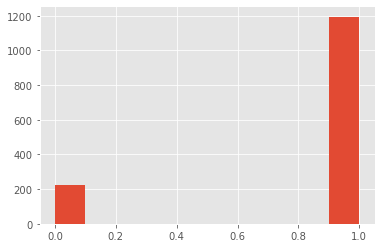

In [51]:
y_test.hist()
plt.show()

In [52]:
weight_0 = 1/len(y_train[y_train==0])
weight_1 = 1/len(y_train[y_train==1])
sample_w =[]
for i in y_train:
    if i ==0: sample_w.append(weight_0)
    if i ==1: sample_w.append(weight_1)


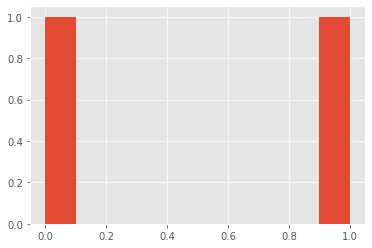

In [53]:
plt.hist(y_train,weights=sample_w)
plt.show()

In [56]:
%%time
weight_0 = 1/len(y_train[y_train==0])
weight_0 = 1/len(y_train[y_train==1])
class_weight = {0: weight_0, 1: weight_0}
history = model.fit(X_train[categorical_headers_ints].to_numpy(), y_train.to_numpy(), epochs=25, batch_size=128, verbose=1,class_weight=class_weight,validation_data=(X_test[categorical_headers_ints].to_numpy(), y_test.to_numpy()))

from sklearn import metrics as mt
yhat_proba = model.predict(X_test[categorical_headers_ints].to_numpy())
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test.to_numpy(),yhat))
print(mt.classification_report(y_test.to_numpy(),yhat))

Epoch 1/25
45/45 [==============================] - 0s 3ms/step - loss: 1.4455e-04 - fn: 320.0000 - fp: 845.0000 - tn: 45.0000 - tp: 4454.0000 - precision: 0.8405 - recall: 0.9330 - val_loss: 0.6902 - val_fn: 89.0000 - val_fp: 213.0000 - val_tn: 10.0000 - val_tp: 1105.0000 - val_precision: 0.8384 - val_recall: 0.9255
Epoch 2/25
45/45 [==============================] - 0s 2ms/step - loss: 1.4455e-04 - fn: 319.0000 - fp: 846.0000 - tn: 44.0000 - tp: 4455.0000 - precision: 0.8404 - recall: 0.9332 - val_loss: 0.6902 - val_fn: 89.0000 - val_fp: 213.0000 - val_tn: 10.0000 - val_tp: 1105.0000 - val_precision: 0.8384 - val_recall: 0.9255
Epoch 3/25
45/45 [==============================] - 0s 2ms/step - loss: 1.4454e-04 - fn: 316.0000 - fp: 846.0000 - tn: 44.0000 - tp: 4458.0000 - precision: 0.8405 - recall: 0.9338 - val_loss: 0.6902 - val_fn: 89.0000 - val_fp: 213.0000 - val_tn: 10.0000 - val_tp: 1105.0000 - val_precision: 0.8384 - val_recall: 0.9255
Epoch 4/25
45/45 [=========================

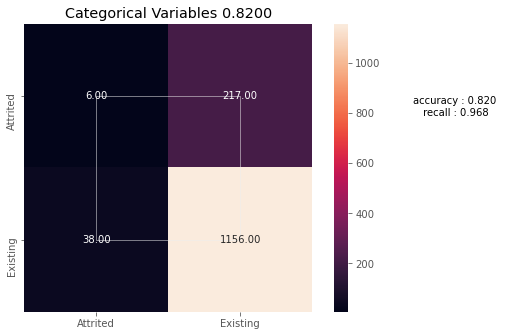

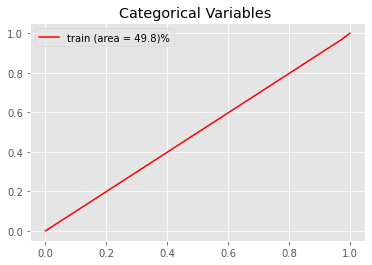

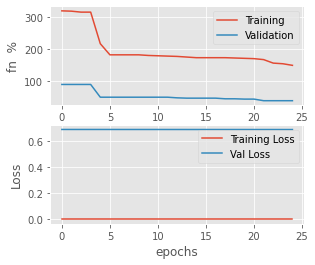

In [57]:
summarize_net(model,yhat,y_test.to_numpy(),"Categorical Variables ")
plt.show()
plt.figure()
plot_roc(0,"Categorical Variables ",y_test.to_numpy(),yhat)

plot_train_val("fn ",history.history['fn'],history.history['val_fn'],history.history['loss'],history.history['val_loss'])



In [66]:
X_train, X_test, y_train, y_test = train_test_split(df , df["Attrition_Flag_int"] , test_size=0.20, random_state=42,stratify=df["Attrition_Flag_int"])

X_train_cat = X_train[categorical_headers_ints].to_numpy()
X_test_cat = X_test[categorical_headers_ints].to_numpy()

X_train_num = X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()


ss = StandardScaler()
X_train_num = ss.fit_transform(X_train_num)
X_test_num = ss.transform(X_test_num)


all_branch_outputs = [] # this is where we will keep track of output of each branch


# -----Like previous example, use embeddings from the integer data -----
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    # N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[categorical_headers[idx]].classes_)
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_branch_outputs.append(x)
# -----HERE IS THE ADDING OF AN INPUT USING NUMERIC DATA-----
# create dense input branch for numeric
inputs_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=13, activation='relu', name='num_1',kernel_initializer=tf.keras.initializers.GlorotUniform() )(inputs_num)
    
all_branch_outputs.append(x_dense)
# -------------------------------------------------------------------

# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=21, activation='relu', name='combined_2',kernel_initializer=tf.keras.initializers.GlorotUniform() )(final_branch)
final_branch = Dropout(0.8)(final_branch)
final_branch = Dense(units=21, activation='relu', name='combined_3',kernel_initializer=tf.keras.initializers.GlorotUniform() )(final_branch)
final_branch = Dropout(0.8)(final_branch)
final_branch = Dense(units=10, activation='relu', name='combined_4',kernel_initializer=tf.keras.initializers.GlorotUniform() )(final_branch)
final_branch = Dense(units=1, activation='sigmoid', name='combined_5')(final_branch)

model = Model(inputs=[input_cat,inputs_num], outputs=final_branch)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(name="auc")])

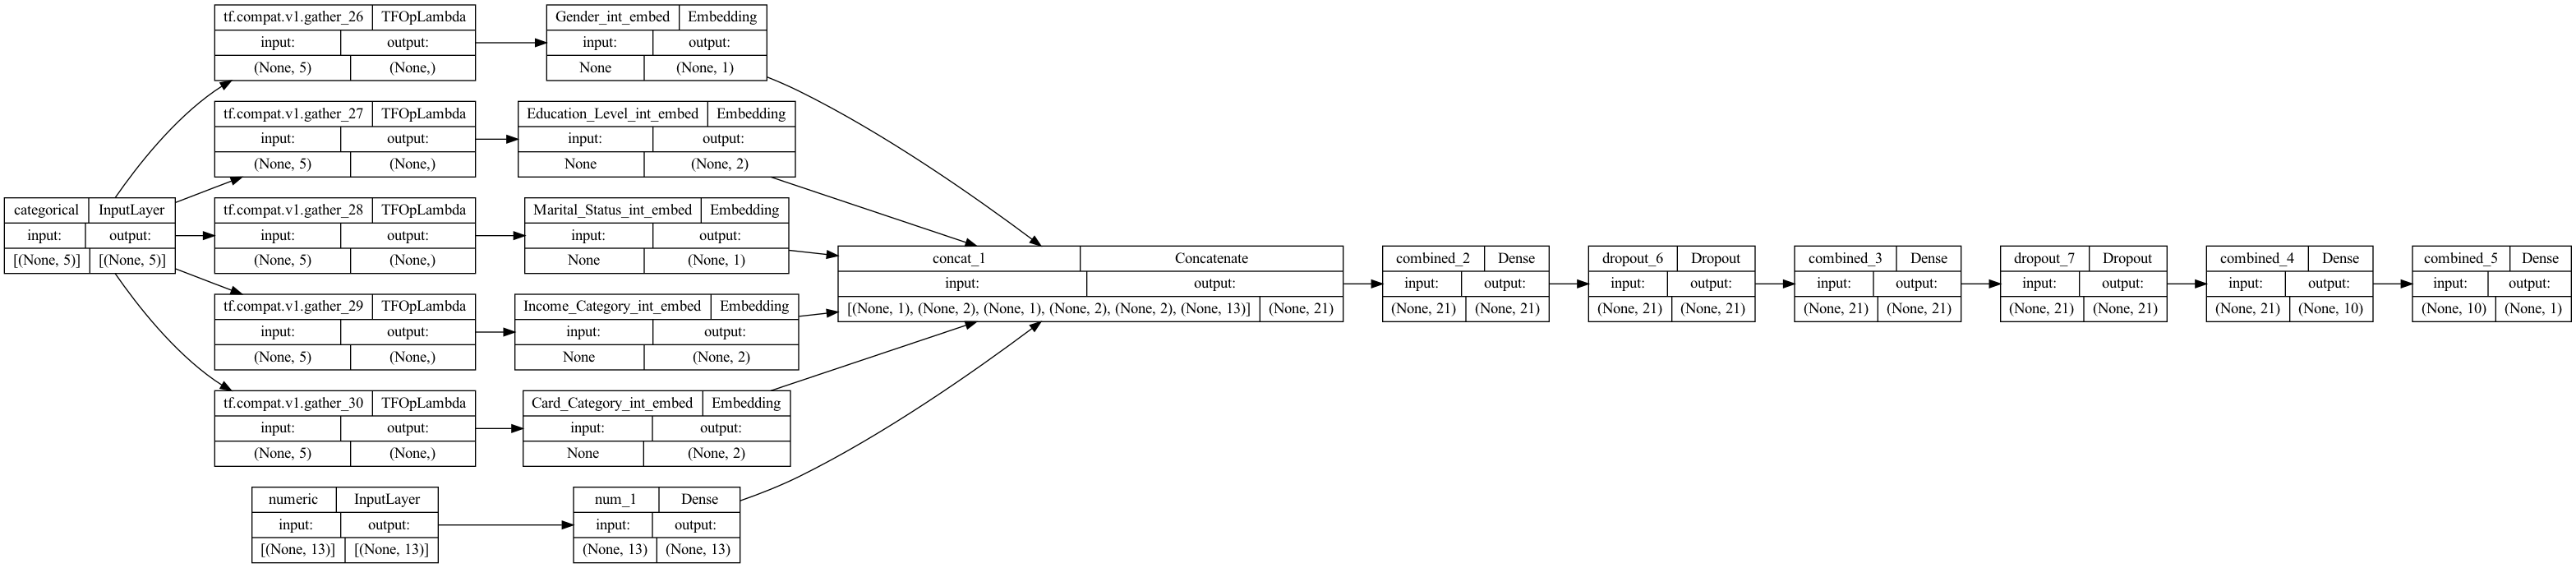

In [67]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

Epoch 1/15
45/45 [==============================] - 2s 7ms/step - loss: 5.3219e-05 - accuracy: 0.8842 - val_loss: 0.2442 - val_accuracy: 0.9224
Epoch 2/15
45/45 [==============================] - 0s 3ms/step - loss: 5.2579e-05 - accuracy: 0.8925 - val_loss: 0.2518 - val_accuracy: 0.9245
Epoch 3/15
45/45 [==============================] - 0s 3ms/step - loss: 5.2211e-05 - accuracy: 0.8902 - val_loss: 0.2452 - val_accuracy: 0.9252
Epoch 4/15
45/45 [==============================] - 0s 3ms/step - loss: 5.2949e-05 - accuracy: 0.8918 - val_loss: 0.2505 - val_accuracy: 0.9231
Epoch 5/15
45/45 [==============================] - 0s 3ms/step - loss: 5.2228e-05 - accuracy: 0.8934 - val_loss: 0.2417 - val_accuracy: 0.9210
Epoch 6/15
45/45 [==============================] - 0s 3ms/step - loss: 5.3163e-05 - accuracy: 0.8902 - val_loss: 0.2523 - val_accuracy: 0.9238
Epoch 7/15
45/45 [==============================] - 0s 3ms/step - loss: 5.1636e-05 - accuracy: 0.8912 - val_loss: 0.2484 - val_accuracy:

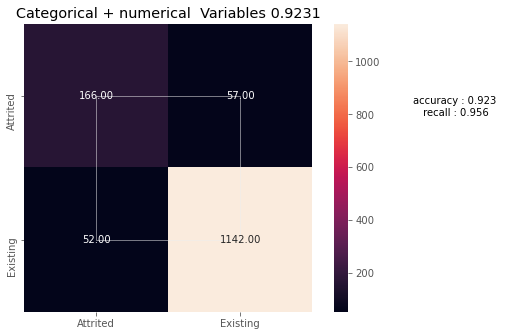

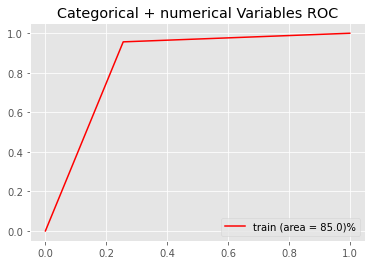

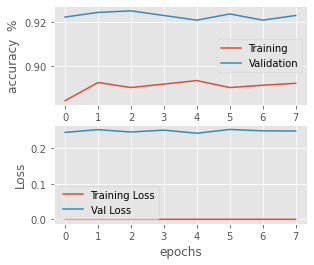

CPU times: user 4.2 s, sys: 630 ms, total: 4.83 s
Wall time: 3.69 s


In [75]:
%%time

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

weight_0 = 1/len(y_train[y_train==0])
weight_0 = 1/len(y_train[y_train==1])
class_weight = {0: weight_0, 1: weight_0}

history = model.fit([X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=128, 
                    verbose=1,
                    callbacks=[callback], 
                    validation_data = ([X_test_cat,X_test_num],y_test),
                    class_weight=class_weight)

yhat = model.predict([X_test_cat,X_test_num]) # each branch has an input

yhat = np.round(yhat)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

summarize_net(model,yhat,y_test.to_numpy(),"Categorical + numerical  Variables ")
plt.show()
plt.figure()
plot_roc(0,"Categorical + numerical Variables ROC",y_test.to_numpy(),yhat)
plot_train_val("accuracy ",history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'])

In [74]:
# sandbox for looking at different categorical variables
for col in categorical_headers:
    vals = df[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

Gender has 2 unique values:
['M' 'F']
Education_Level has 6 unique values:
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status has 3 unique values:
['Married' 'Single' 'Divorced']
Income_Category has 5 unique values:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Card_Category has 4 unique values:
['Blue' 'Gold' 'Silver' 'Platinum']


In [75]:
# now let's create some different crossed values
# possible crossing options:
#   'workclass','education','marital_status',
#   'occupation','relationship','race',
#   'sex','country'

# choose these as a class, what makes sense??
cross_columns = [['Gender','Education_Level','Marital_Status','Income_Category'],
                 ['Gender','Education_Level','Marital_Status'],
                 ['Gender','Education_Level','Income_Category'],
                 ['Gender','Education_Level']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df[cols_list].apply(lambda x: '_'.join(x), axis=1)
    # X_crossed_test = df[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities

    
    # 3. Save into dataframe with new name
    df[cross_col_name] = enc.fit_transform(X_crossed_train)
    # df[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['Gender_Education_Level_Marital_Status_Income_Category',
 'Gender_Education_Level_Marital_Status',
 'Gender_Education_Level_Income_Category',
 'Gender_Education_Level']

In [76]:
X_train_crossed, X_test_crossed, y_train_crossed, y_test_crossed = train_test_split(df , df["Attrition_Flag_int"] , test_size=0.20, random_state=42,stratify=df["Attrition_Flag_int"])

# X_train_cat = X_train[categorical_headers_ints].to_numpy()
# X_test_cat = X_test[categorical_headers_ints].to_numpy()

# X_train_num = X_train[numeric_headers].to_numpy()
# X_test_num = X_test[numeric_headers].to_numpy()


# ss = StandardScaler()
# X_train_num = ss.fit_transform(X_train_num)
# X_test_num = ss.transform(X_test_num)




X_train_crossed = X_train_crossed[cross_col_df_names]
X_test_crossed = X_test_crossed[cross_col_df_names]

crossed_outputs = [] # this is where we will keep track of output of each branch

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    # N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='concat_1')
wide_branch = Dense(units=1,activation='sigmoid', name='combined')(wide_branch)

model = Model(inputs=input_crossed, outputs=wide_branch)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(name="auc")])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=2)

history = model.fit(X_train_crossed.to_numpy(),y_train_crossed, epochs=70, 
                    batch_size=128, 
                    verbose=1,
                    callbacks=[callback], 
                    validation_data = (X_test_crossed.to_numpy(),y_test_crossed))

Epoch 1/70
45/45 [==============================] - 1s 5ms/step - loss: 0.6530 - auc: 0.4889 - val_loss: 0.6072 - val_auc: 0.5091
Epoch 2/70
45/45 [==============================] - 0s 1ms/step - loss: 0.5655 - auc: 0.5093 - val_loss: 0.5251 - val_auc: 0.5073
Epoch 3/70
45/45 [==============================] - 0s 1ms/step - loss: 0.4933 - auc: 0.5240 - val_loss: 0.4712 - val_auc: 0.5039


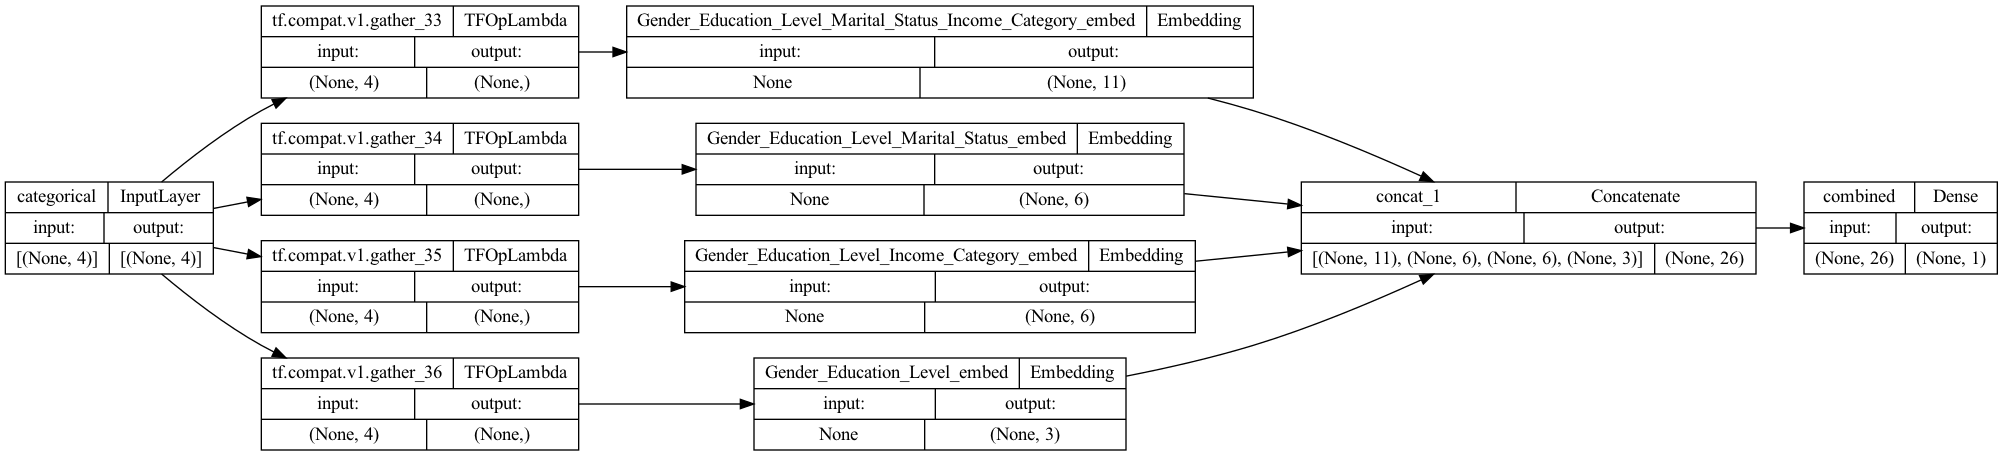

In [77]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [78]:
yhat = np.round(model.predict(X_test_crossed.to_numpy()))
print(mt.confusion_matrix(y_test_crossed.to_numpy(),yhat))
print(mt.classification_report(y_test_crossed.to_numpy(),yhat))

45/45 [==============================] - 0s 709us/step
[[   0  223]
 [   0 1194]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.84      1.00      0.91      1194

    accuracy                           0.84      1417
   macro avg       0.42      0.50      0.46      1417
weighted avg       0.71      0.84      0.77      1417



/Users/48391139/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/48391139/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/48391139/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


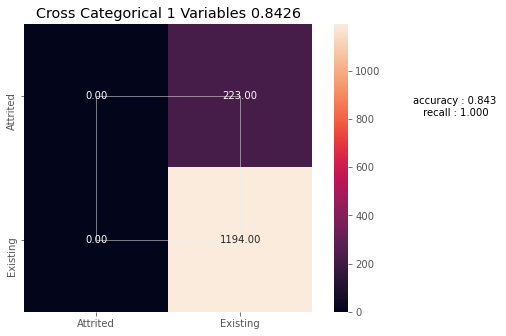

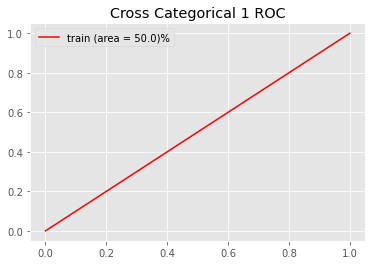

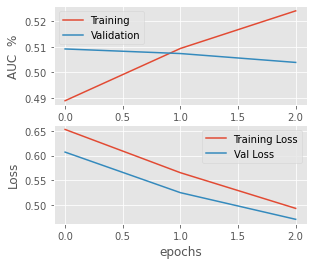

In [79]:
summarize_net(model,yhat,y_test_crossed.to_numpy(),"Cross Categorical 1 Variables ")
plt.show()
plt.figure()
plot_roc(0,"Cross Categorical 1 ROC",y_test_crossed.to_numpy(),yhat)
plot_train_val("AUC ",history.history['auc'],history.history['val_auc'],history.history['loss'],history.history['val_loss'])

# plt.figure(figsize=(10,4))
# plt.subplot(2,2,1)
# plt.plot(history.history['auc'],label='Training')

# plt.ylabel('AUC %')
# # plt.title('Training')
# # plt.subplot(2,2,2)
# plt.plot(history.history['val_auc'],label='Validation')
# # plt.title('Validation')
# plt.legend()

# plt.subplot(2,2,3)
# plt.plot(history.history['loss'],label='Training Loss')
# # plt.ylabel('Training Loss')
# plt.xlabel('epochs')
# plt.ylabel('Loss')

# # plt.subplot(2,2,4)
# plt.plot(history.history['val_loss'],label='Val Loss')
# plt.xlabel('epochs')
# plt.legend()
# plt.show()

In [80]:
X_train_crossed, X_test_crossed, y_train_crossed, y_test_crossed = train_test_split(df , df["Attrition_Flag_int"] , test_size=0.20, random_state=42,stratify=df["Attrition_Flag_int"])


# save categorical features
X_train_cat = X_train_crossed[categorical_headers_ints].to_numpy() 
X_test_cat = X_test_crossed[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train_crossed[numeric_headers].to_numpy()
X_test_num = X_test_crossed[numeric_headers].to_numpy()

# get crossed columns
X_train_crossed = X_train_crossed[cross_col_df_names].to_numpy()
X_test_crossed = X_test_crossed[cross_col_df_names].to_numpy()


ss = StandardScaler()
X_train_num = ss.fit_transform(X_train_num)
X_test_num = ss.transform(X_test_num)


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df[col].max(),df[col].max())+1
    # N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df[col].max(),df[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

all_deep_branch_outputs.append(wide_branch)
# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
# final_branch = concatenate([wide_branch, deep_branch],
                        #    name='concat_deep_wide')
final_branch = Dense(units=42,activation='relu',name='final0')(deep_branch)
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

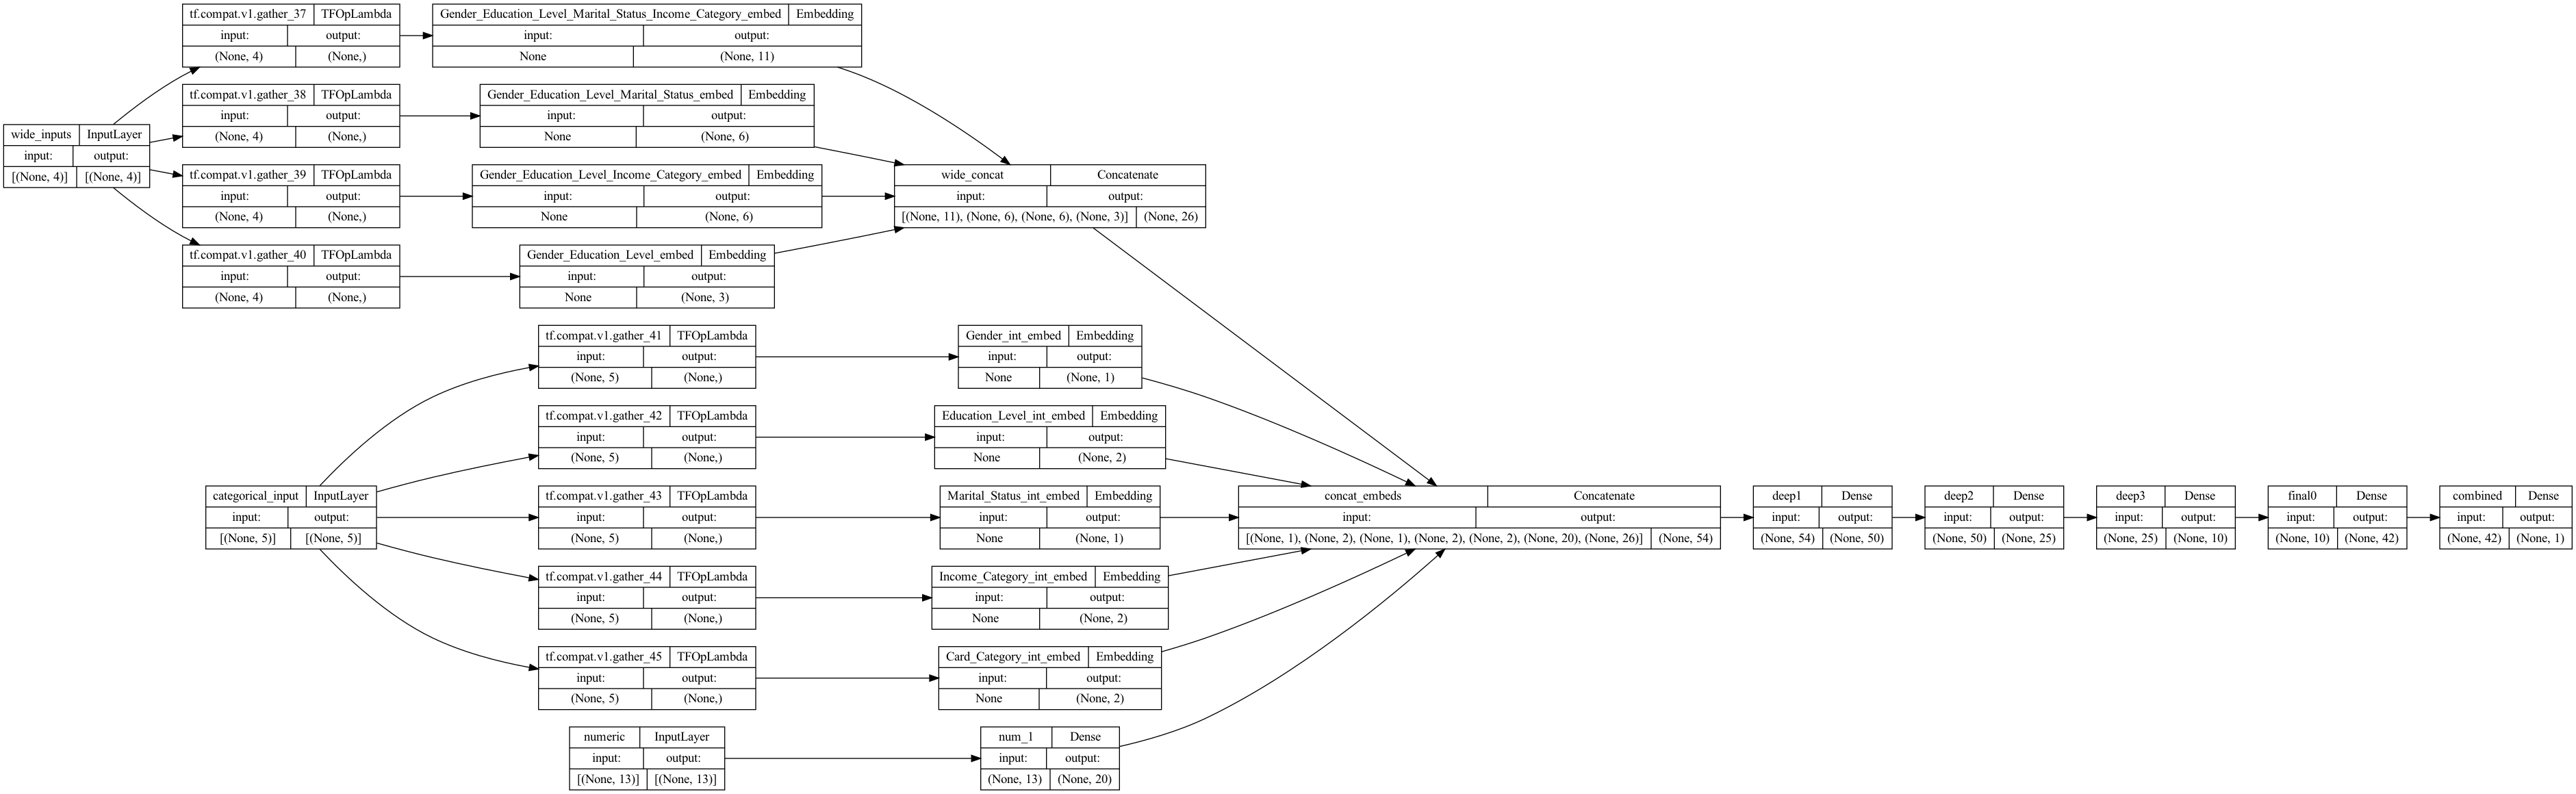

In [81]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
# model.summary()""

In [82]:
%%time

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(name="auc")])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=2)

history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=70, 
                    batch_size=32, 
                    verbose=1,
                    callbacks=[callback], 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test_crossed))

yhat = model.predict([X_test_crossed,X_test_cat,X_test_num]) # each branch has an input



Epoch 1/70
177/177 [==============================] - 2s 3ms/step - loss: 0.3926 - auc: 0.7345 - val_loss: 0.3210 - val_auc: 0.8552
Epoch 2/70
177/177 [==============================] - 0s 2ms/step - loss: 0.2617 - auc: 0.9098 - val_loss: 0.2573 - val_auc: 0.9046
Epoch 3/70
177/177 [==============================] - 0s 1ms/step - loss: 0.2154 - auc: 0.9375 - val_loss: 0.2403 - val_auc: 0.9233
Epoch 4/70
177/177 [==============================] - 0s 2ms/step - loss: 0.1878 - auc: 0.9528 - val_loss: 0.2176 - val_auc: 0.9369
Epoch 5/70
177/177 [==============================] - 0s 2ms/step - loss: 0.1657 - auc: 0.9632 - val_loss: 0.2096 - val_auc: 0.9440
Epoch 6/70
177/177 [==============================] - 0s 1ms/step - loss: 0.1557 - auc: 0.9671 - val_loss: 0.2053 - val_auc: 0.9466
Epoch 7/70
177/177 [==============================] - 0s 1ms/step - loss: 0.1431 - auc: 0.9731 - val_loss: 0.2248 - val_auc: 0.9444
Epoch 8/70
177/177 [==============================] - 0s 1ms/step - loss: 0.

In [83]:
yhat = model.predict([X_test_crossed,X_test_cat,X_test_num])
yhat = np.round(yhat)
print(mt.confusion_matrix(y_test_crossed,yhat))
print(mt.classification_report(y_test_crossed,yhat))

45/45 [==============================] - 0s 992us/step
[[ 144   79]
 [  33 1161]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       223
           1       0.94      0.97      0.95      1194

    accuracy                           0.92      1417
   macro avg       0.87      0.81      0.84      1417
weighted avg       0.92      0.92      0.92      1417



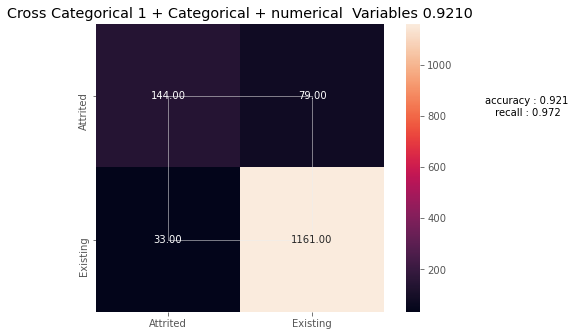

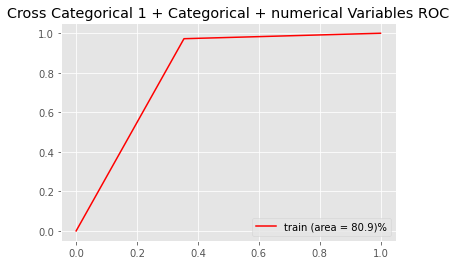

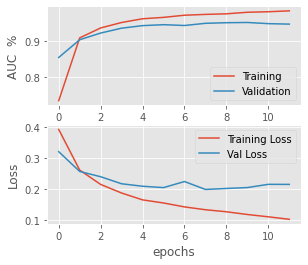

In [84]:
summarize_net(model,yhat,y_test_crossed.to_numpy(),"Cross Categorical 1 + Categorical + numerical  Variables ")
plt.show()
plt.figure()
plot_roc(0,"Cross Categorical 1 + Categorical + numerical Variables ROC",y_test_crossed.to_numpy(),yhat)
plot_train_val("AUC ",history.history['auc'],history.history['val_auc'],history.history['loss'],history.history['val_loss'])




In [82]:
cross_columns = [['Credit_Limit','Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'],
                 ['Customer_Age','Dependent_count','Marital_Status', 'Credit_Limit'],
                 ['Months_on_book','Total_Relationship_Count','Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1']
                ]


# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df[cols_list].apply(lambda x: '_'.join(map(str, x)), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(map(str, cols_list))
        
    # 3. Save into dataframe with new name
    df[cross_col_name] = enc.fit_transform(X_crossed_train)

    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['Credit_Limit_Total_Revolving_Bal_Total_Trans_Amt_Avg_Utilization_Ratio',
 'Customer_Age_Dependent_count_Marital_Status_Credit_Limit',
 'Months_on_book_Total_Relationship_Count_Total_Revolving_Bal_Total_Amt_Chng_Q4_Q1']

In [83]:
X_train_crossed, X_test_crossed, y_train_crossed, y_test_crossed = train_test_split(df , df["Attrition_Flag_int"] , test_size=0.20, random_state=42,stratify=df["Attrition_Flag_int"])


# save categorical features
X_train_cat = X_train_crossed[categorical_headers_ints].to_numpy() 
X_test_cat = X_test_crossed[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train_crossed[numeric_headers].to_numpy()
X_test_num = X_test_crossed[numeric_headers].to_numpy()

# get crossed columns
X_train_crossed = X_train_crossed[cross_col_df_names].to_numpy()
X_test_crossed = X_test_crossed[cross_col_df_names].to_numpy()


ss = StandardScaler()
X_train_num = ss.fit_transform(X_train_num)
X_test_num = ss.transform(X_test_num)


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df[col].max(),df[col].max())+1
    # N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df[col].max(),df[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)
# all_deep_branch_outputs.append(wide_branch)

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
final_branch = Dropout(0.8)(deep_branch)
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

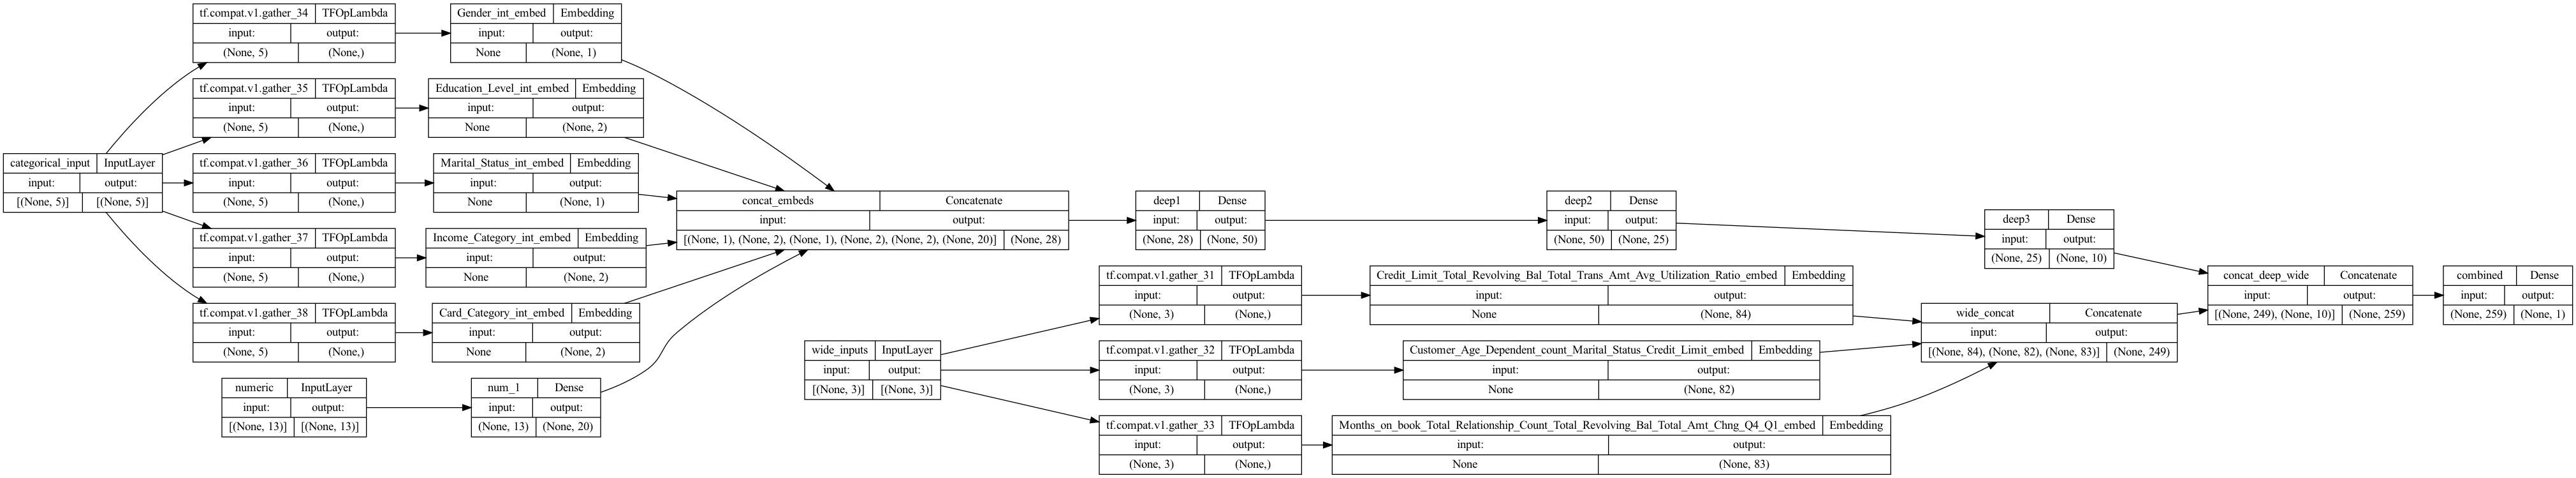

In [84]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [85]:
%%time

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(name="auc")])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=2)

history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=3, 
                    batch_size=32, 
                    verbose=1,
                    callbacks=[callback], 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test_crossed))

yhat = model.predict([X_test_crossed,X_test_cat,X_test_num]) # each branch has an input
yhat = np.round(yhat)


Epoch 1/70
177/177 [==============================] - 4s 17ms/step - loss: 0.4426 - auc: 0.6567 - val_loss: 0.3414 - val_auc: 0.8214
Epoch 2/70
177/177 [==============================] - 3s 15ms/step - loss: 0.2365 - auc: 0.9285 - val_loss: 0.2896 - val_auc: 0.8626
Epoch 3/70
177/177 [==============================] - 3s 15ms/step - loss: 0.0959 - auc: 0.9952 - val_loss: 0.2762 - val_auc: 0.8822
Epoch 4/70
177/177 [==============================] - 2s 14ms/step - loss: 0.0218 - auc: 1.0000 - val_loss: 0.2748 - val_auc: 0.8902
Epoch 5/70
177/177 [==============================] - 2s 14ms/step - loss: 0.0079 - auc: 1.0000 - val_loss: 0.2652 - val_auc: 0.8923
Epoch 6/70
177/177 [==============================] - 2s 13ms/step - loss: 0.0042 - auc: 1.0000 - val_loss: 0.2642 - val_auc: 0.8945
Epoch 7/70
177/177 [==============================] - 2s 13ms/step - loss: 0.0027 - auc: 1.0000 - val_loss: 0.2623 - val_auc: 0.8953
Epoch 8/70
177/177 [==============================] - 2s 13ms/step - 

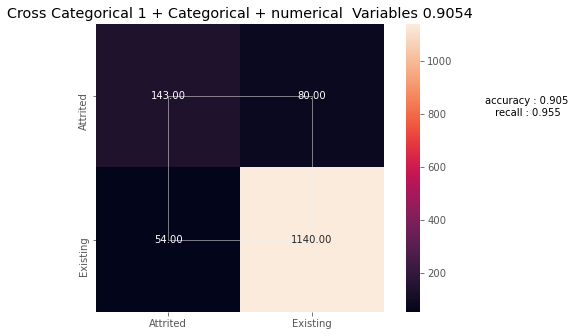

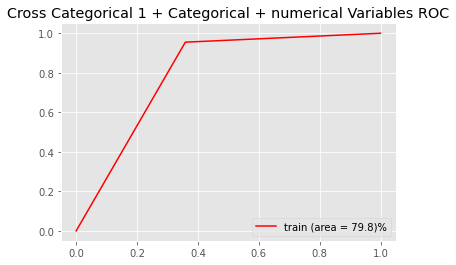

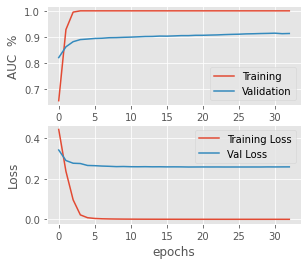

In [87]:
summarize_net(model,yhat,y_test_crossed.to_numpy(),"Cross Categorical 1 + Categorical + numerical  Variables ")
plt.show()
plt.figure()
plot_roc(0,"Cross Categorical 1 + Categorical + numerical Variables ROC",y_test_crossed.to_numpy(),yhat)
plot_train_val("AUC ",history.history['auc'],history.history['val_auc'],history.history['loss'],history.history['val_loss'])




In [ ]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test_crossed,yhat))
print(mt.classification_report(y_test_crossed,yhat))

64/64 [==============================] - 0s 1ms/step
[[ 317    8]
 [1686   15]]
              precision    recall  f1-score   support

           0       0.16      0.98      0.27       325
           1       0.65      0.01      0.02      1701

    accuracy                           0.16      2026
   macro avg       0.41      0.49      0.14      2026
weighted avg       0.57      0.16      0.06      2026



45/45 [==============================] - 0s 1ms/step


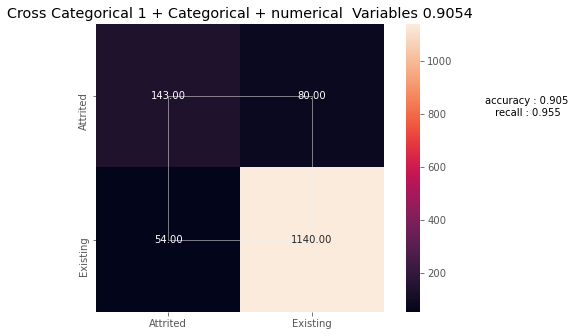

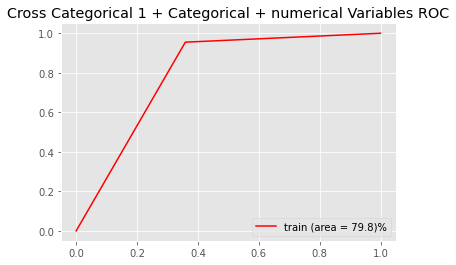

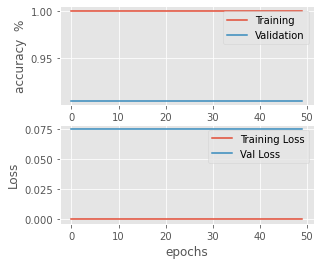

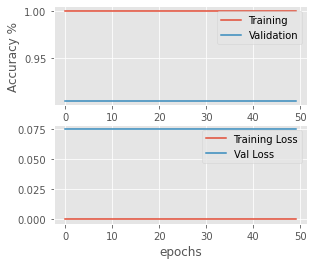

In [89]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train_crossed, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test_crossed))

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))

summarize_net(model,yhat,y_test_crossed.to_numpy(),"Cross Categorical 1 + Categorical + numerical  Variables ")
plt.show()
plt.figure()
plot_roc(0,"Cross Categorical 1 + Categorical + numerical Variables ROC",y_test_crossed.to_numpy(),yhat)
plot_train_val("accuracy ",history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'])


%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'],label='Training')

plt.ylabel('Accuracy %')
# plt.title('Training')
# plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'],label='Validation')
# plt.title('Validation')
plt.legend()

plt.subplot(2,2,3)
plt.plot(history.history['loss'],label='Training Loss')
# plt.ylabel('Training Loss')
plt.xlabel('epochs')

# plt.subplot(2,2,4)
plt.plot(history.history['val_loss'],label='Val Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# compare to just deep network (no wide)

model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train_crossed,
        epochs=10, batch_size=32, verbose=1)

NameError: name 'Sequential' is not defined

In [ ]:
yhat = np.round(model.predict(X_test))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

64/64 [==============================] - 0s 740us/step
[[1575  124]
 [ 296   31]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      1699
         1.0       0.20      0.09      0.13       327

    accuracy                           0.79      2026
   macro avg       0.52      0.51      0.51      2026
weighted avg       0.74      0.79      0.76      2026



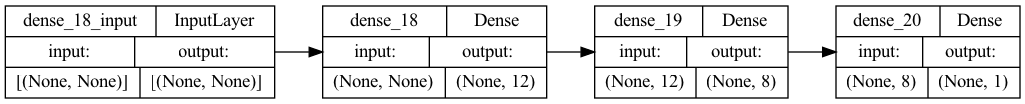

In [ ]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [ ]:
# more branches!!

model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train_crossed,
        epochs=10, batch_size=32, verbose=1)

Epoch 1/10
254/254 [==============================] - 1s 1ms/step - loss: 1.6158 - recall_15: 0.7494
Epoch 2/10
254/254 [==============================] - 0s 1ms/step - loss: 0.6123 - recall_15: 1.0000
Epoch 3/10
254/254 [==============================] - 0s 1ms/step - loss: 0.5675 - recall_15: 1.0000
Epoch 4/10
254/254 [==============================] - 0s 1ms/step - loss: 0.5317 - recall_15: 1.0000
Epoch 5/10
254/254 [==============================] - 0s 1ms/step - loss: 0.5045 - recall_15: 1.0000
Epoch 6/10
254/254 [==============================] - 0s 1ms/step - loss: 0.4843 - recall_15: 1.0000
Epoch 7/10
254/254 [==============================] - 0s 1ms/step - loss: 0.4698 - recall_15: 1.0000
Epoch 8/10
254/254 [==============================] - 0s 1ms/step - loss: 0.4596 - recall_15: 1.0000
Epoch 9/10
254/254 [==============================] - 0s 1ms/step - loss: 0.4527 - recall_15: 1.0000
Epoch 10/10
254/254 [==============================] - 0s 1ms/step - loss: 0.4481 - recall_

In [ ]:
yhat = np.round(model.predict(X_test))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

64/64 [==============================] - 0s 785us/step
[[   0 1699]
 [   0  327]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1699
         1.0       0.16      1.00      0.28       327

    accuracy                           0.16      2026
   macro avg       0.08      0.50      0.14      2026
weighted avg       0.03      0.16      0.04      2026



/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


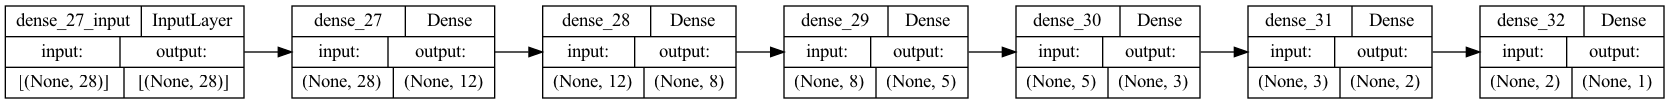

In [ ]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

For the modeling section of this lab, we implemented and plotted many different wide and deep networks to compare the performance when you cross different features or add more layers. We also created a network that was deep but not wide to compare the performance of this network to the wide and deep network.

To begin with, we splitted our data into categorical and numerical categories. This is so that we can later test our network using just categorical data, or using both sections to see which our network performs better on. We ran our first deep network before crossing any variables just to see what the performance would be. Additionally, we ensured that the metric we were using when compiling our model was 'recall', called as _tf.keras.metrics.Recall()_, because recall fits our business use case better than accuracy, as discussed above. The first summary of our model shows that all 54 of our parameters are trainable, which is good news, as we can now watch our model train itself and improve its performance.

We plotted our first model using the plot_model function as shown in class. This provides us a good visual of how wide and deep our network is and how many layers it contains. It tells us the change in dimension from the input to the output layers to visualize how the shape of our neural network changes as data progresses through. After creating this first base model, we then create a training and testing set using random state for 20% of the data, as discussed above. Then we created a confusion matrix, which we will do for every model we train, so that we can see the statistics of this model. First off, it is important to note that in our target sets, '0' means Attrited Customer and '1' means Existing Customer.

In our confusion matrix, we get precision, recall, and f1 score of '0' for our target value of '0', or attrited customer. This likely means that 0 true positive instances were identified for our attrited customers, which is definitely worrisome. If we identify everyone as an existing customer, we will never find the attrited customers to offer benefits to. However, for our target value of '1', we get a precision of .84, a perfect recall, and a F1 score of .91. The perfect recall means that every existing customer was properly identified, which makes sense, as no attrited customers were properly identified. Therefore, this must mean that our model is predicting everybody as an existing customer, which is incredibly worrisome, as we truly need to identify the attrited customers for our business use case. Finally, our accuracy was .84, but this doesn't matter whatsoever, as 84% of the dataset is existing customers. This confirms the theory that our model is predicting every single instance as an existing customer.

Then, we created another network but we added an input so that we could use numeric data in this network as well, since the first model was purely categorical data. The visualization of this model contains one extra step and it goes wider as well, depicting that our network gets deeper and wider as we add more data to it. After creating this model, the confusion matrix was far more hopeful. It still wasn't amazing, but we had an accuracy of .90, and for '1' (which is our existing customer) we got a precision of .92, a recall of .97, and a f1 of .94. Both the F1 score and the precision were higher, and the recall was slightly lower than before, but the confusion matrix for our attrited customer makes up for this. For attrited customers, precision was at .78, recall was at .55, and our f1 score was .64. This is a huge improvement over our last confusion matrix and provides some hope that now, we have a chance at identifying attrited customers.

Realistically, with attrited customers only making up about 16% of the dataset, it can be far harder to find distinguishing characteristics with which to identify them. Therefore, the fact that our recall was above 50% is impressive and a huge step in the right direction. For this model, we also graphed training vs. validation performance and loss over our 50 epochs. As you can see in the graphs, our validation loss was steadily larger than our training loss, regardless of the number of epochs. However, our validation and training accuracy were around the same points for any epoch greater than 20, with validation accuracy even surpassing training accuracy at some instances. This shows that our model that uses both numerical and categorical data is far superior. Note, however, that we have not crossed any values yet. This is the next step.

To be honest, crossing these features may improve the model or it may add extra noise that ends up worsening the model, but either way, we want to see how it works out. We cross our first batch of values, as discussed in 'preparation' above. This batch contains four different crosses, each containing different combinations of the same four variables. For this first network, we only use categorical data, because we want to compare the performance of that to the performance once numerical data has been introduced.

After plotting our model, we create the confusion matrix, and it has the exact same values as the first one did. We get precision, recall, and f1 score of '0' for our target value of '0', or attrited customer. Therefore, we again identify 0 true positive instances of our attrited customers, a definite issue for our business use case, as aforementioned. I don't want to get too repetitive, but again, our target value of '1' gets a precision of .84, a perfect recall, and a F1 score of .91. Yet again, our model is predicting everybody as an existing customer, so it appears that crossing the values did not have an impact on this performance and that using only categorical data, and excluding numerical data, ends up with a model that is extremely biased towards the class with the majority of instances.

We make a fourth network by keeping our crossed columns and introducing numerical data to the other code that we had. This network is far larger. It is definitely wide and deep and has numerous small box plots that show the true extent of this network we just created. However, when making our confusion matrix for this model, we get the exact same models as we did before. This is yet again a problem. Right now, our best hope seems to be the network that uses numerical data but does not cross values. However, our graphs of training vs. validation for both loss and accuracy perform better on this dataset that uses crossed features. For both accuracy and loss, both the training and validation sets perform almost exactly the same, showing that our model has been trained well, yet is somehow unable to predict the attrited customers. Another interesting thing is that this graph goes up to 92.5% accuracy after 50 epochs, yet we are at 84% accuracy on the confusion matrix, so there is a clear gap there that, if explored deeper, may help to explain the terrible performance on the attrited customer set.

This was the end of this batch of crosses. Next, we created a new training and testing set, as well as a training and testing dataframe, so that we can have more functionality moving forward. We then attempt to cross our second batch of columns, which include three crosses. We have been having no luck on the networks containing purely categorical data, so we added numeric data to this one, yet even though the network was extremely wide and deep and looked like it would have trained well, we get the exact same values in our confusion matrix for some reason. However, the model accuracy on the graphs gets extremely high, and the model loss gets extremely low for both testing and validation sets. In fact, the test and validation sets are almost identical, and the accuracy reaches up to about 95% by the 50th epoch, which shows some clear gap between the confusion matrix and the graph and raises further questions.

First, we created a simple three layer network, and the most interesting thing here was that the attrited customer and existing customer were flipped. That is, the attrited customer had far higher scores than the existing customer on every metric. Our first 3 layer network had an accuracy of .79, slightly lower than all of our other models, but the existing customer had a precision of .2, recall of .09, and F1 of .13. For our attrited customers, all the values were slightly lower than the existing customer values in the majority of our other models. Therefore, this deep network performed worse than our best wide and deep network, but it performed on about the same level as the rest of our wide and deep networks. However, for our business use case, we might even say that it performed better than the majority of our other models, since having a bias towards labelling customers as 'at risk for attrition' is less costly than having a bias towards ignoring any of that risk.

Finally, we created a deep but not wide network with 6 layers, and this one had a score of 0 for precision, recall, and f1-score for the existing customer. It had a recall of 1 for the attrited customer, yet the f1-score and precision score were far lower - .28 and .16, respectively. To top it all off, the accuracy on this model was .16, which is absolutely horrible. However, this makes sense. It is clear that this model predicted everybody as an attrited customer, and as they make up 16% of the dataset, we got a 16% accuracy. This is why recall was 100% for the attrited customer, and why precision and F1 were so much lower than they were when recall was 100% for the existing customer.

This just goes to show that our network that was deep but not wide had a preference for predicting customers as attrited, whereas our wide and deep network had a preference for predicting existing customers, which was the majority class. Our model that performed the best was the one which used both categorical and numerical data but no cross features. The rest of the models seemed to predict every single instance as an existing customer.

## Exceptional Work

In [ ]:
# REQUIREMENTS (7324): For classification tasks, compare using the receiver operating characteristic
# and area under the curve. 